In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Ian\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Ian\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\Ian\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
#HYDE PARK(02136), SOUTH END(02118)
housing_data = pd.read_csv("Data/2024-property-assessment-data.csv")

C:\Users\Ian\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
housing_data = housing_data.dropna(subset=['YR_BUILT', "ZIP_CODE"])

In [4]:
housing_data['ZIP_CODE'] = housing_data['ZIP_CODE'].apply(lambda x: x if x in [2136, 2118] else 'Other')

In [5]:
type(housing_data["YR_BUILT"][0])

numpy.float64

In [6]:
housing_data = housing_data[housing_data['YR_BUILT'].between(2010,2024)]

In [8]:
housing_data[""]

In [7]:
others_df = df[~df['ZIP_CODE'].isin([2136, 2118])]

NameError: name 'df' is not defined

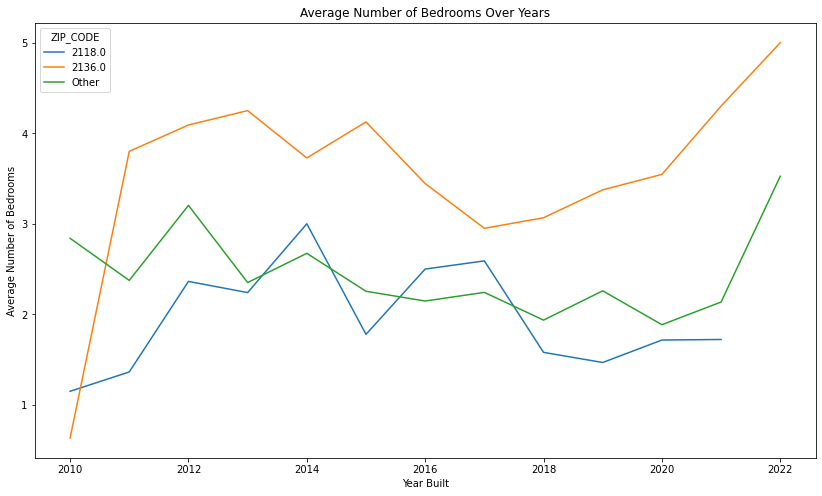

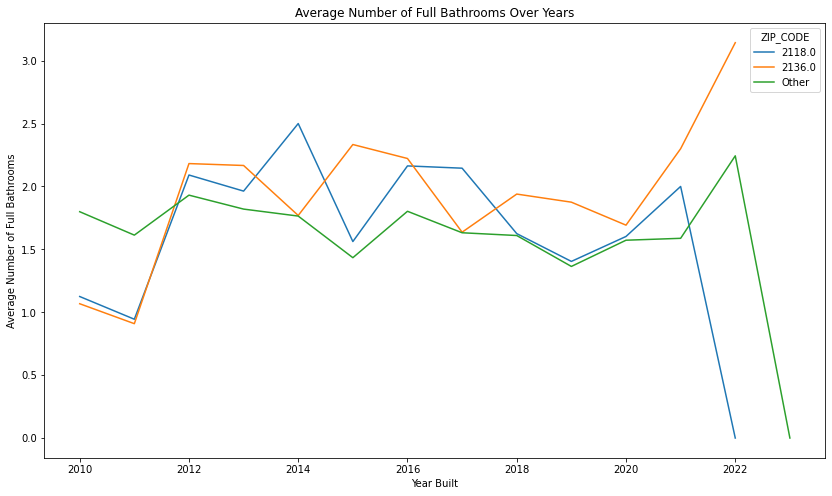

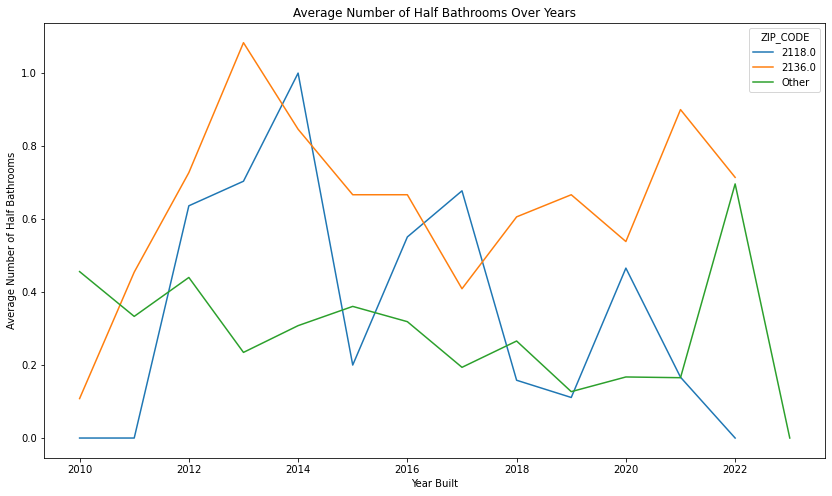

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming housing_data is your DataFrame
# First, filter the dataset to include only houses from Hyde Park and South End
#hyde_park_south_end = housing_data[(housing_data['ZIP_CODE'] == 2136) | (housing_data['ZIP_CODE'] == 2118)]

# Define columns representing housing units
housing_unit_columns = ['RES_UNITS', 'BLDG_TYPE', 'BED_RMS', 'FULL_BTH', 'HLF_BTH', 'YR_BUILT']

# Group by ZIP_CODE and YR_BUILT and aggregate statistics
housing_changes = housing_data.groupby(['ZIP_CODE', 'YR_BUILT'])[housing_unit_columns].agg({
    'RES_UNITS': 'sum',
    'BLDG_TYPE': 'count',  # Count of buildings can indicate changes in housing units
    'BED_RMS': 'mean',  # Average number of bedrooms
    'FULL_BTH': 'mean',  # Average number of full bathrooms
    'HLF_BTH': 'mean'  # Average number of half bathrooms
}).reset_index()

# Create visualizations
plt.figure(figsize=(14, 8))

# Line plot for average number of bedrooms over years
#plt.subplot(2, 2, 1)
sns.lineplot(x='YR_BUILT', y='BED_RMS', hue='ZIP_CODE', data=housing_changes)
plt.title('Average Number of Bedrooms Over Years')
plt.xlabel('Year Built')
plt.ylabel('Average Number of Bedrooms')
plt.show()

# Line plot for average number of full bathrooms over years
#plt.subplot(2, 2, 2)
plt.figure(figsize=(14, 8))
sns.lineplot(x='YR_BUILT', y='FULL_BTH', hue='ZIP_CODE', data=housing_changes)
plt.title('Average Number of Full Bathrooms Over Years')
plt.xlabel('Year Built')
plt.ylabel('Average Number of Full Bathrooms')
plt.show()

# Line plot for average number of half bathrooms over years
#plt.subplot(2, 2, 3)
plt.figure(figsize=(14, 8))
sns.lineplot(x='YR_BUILT', y='HLF_BTH', hue='ZIP_CODE', data=housing_changes)
plt.title('Average Number of Half Bathrooms Over Years')
plt.xlabel('Year Built')
plt.ylabel('Average Number of Half Bathrooms')

#plt.tight_layout()
plt.show()

In [91]:
df =  pd.read_csv("Data/permits.csv")

In [92]:
df.dropna(subset=['zip'], inplace=True)

In [93]:
def remove_leading_zeros(value):
    if isinstance(value, (int, float)):
        return str(int(value))
    elif isinstance(value, str) and value.isdigit():
        return str(int(value))
    else:
        return value

# Apply the function to the DataFrame
df['zip'] = df['zip'].apply(remove_leading_zeros)

In [94]:
values_to_remove = ['02126-1616', '8091', '8']

# Remove rows containing specified values
df = df[~df['zip'].isin(values_to_remove)]

In [95]:
df['zip'] = df['zip'].apply(lambda x: x if x in ["2136", "2118"] else 'Other')

In [96]:
df["issued_date"] = pd.to_datetime(df["issued_date"])  # Convert to datetime if not already
df["year"] = df["issued_date"].dt.year

In [97]:
df = df[df["year"].between(2010,2023)]

In [98]:
permits = [
  "Floor Addition", "Interior Demolition", "Interior Extension", "Interior Renovation"
]

In [99]:
mapping = {
    "FA": "Floor Addition",
    "INTDEM": "Interior Demolition",
    "INTEXT": "Interior Extension",
    "INTREN": "Interior Renovation"
}

# Replace values in the permits column using the mapping dictionary
df['worktype'] = df['worktype'].replace(mapping)

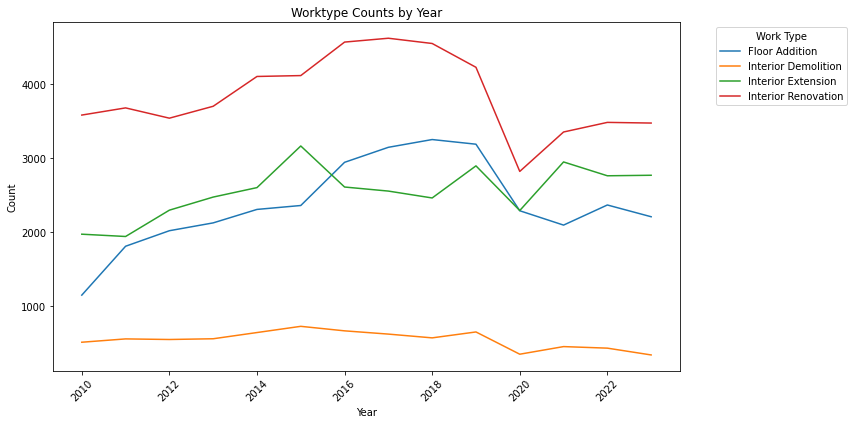

In [100]:
# Filter the DataFrame for only the permits of interest
filtered_df = df[df['worktype'].isin(permits)]

# Group by 'zip' and 'permittypedescr' and get counts
permit_counts = filtered_df.groupby(['zip', 'year', 'worktype']).size().unstack(fill_value=0)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
permit_counts.groupby('year').sum().plot(kind='line', ax=ax)
plt.title('Worktype Counts by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Work Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

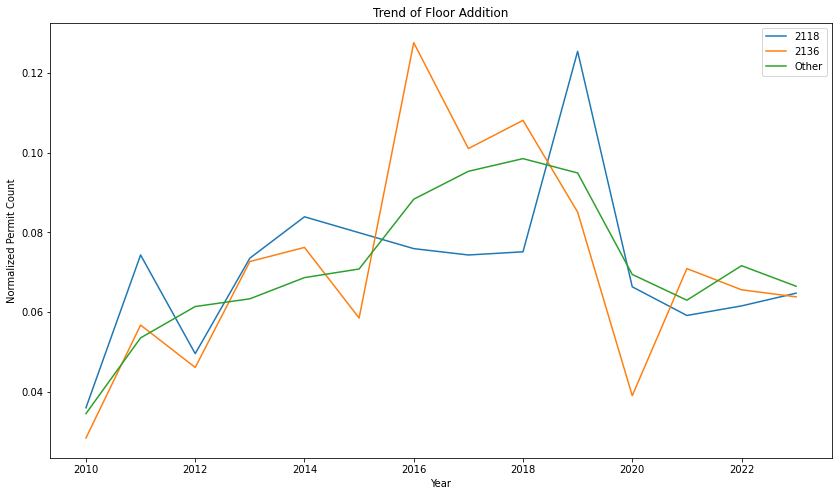

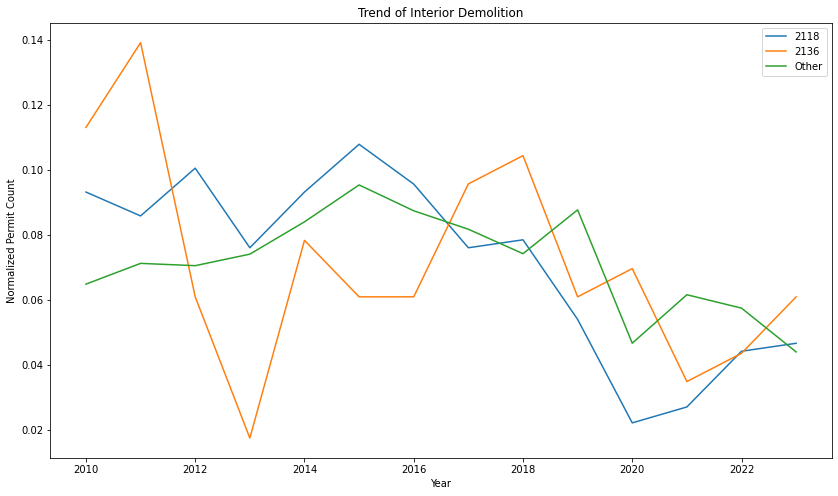

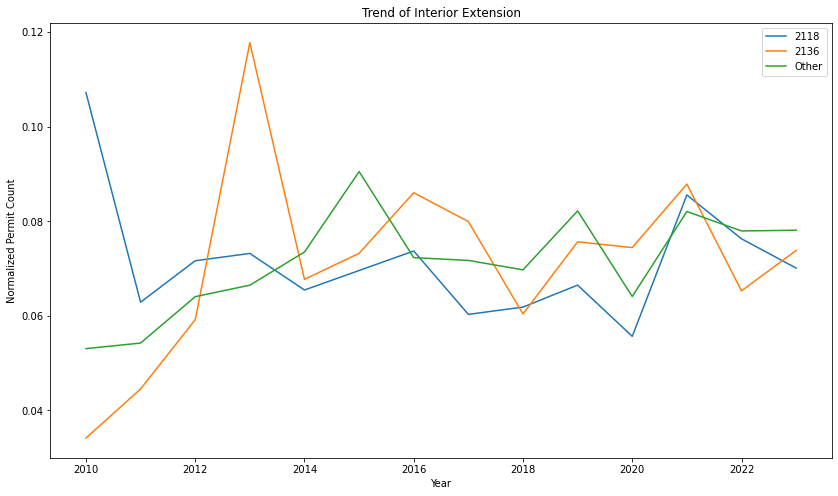

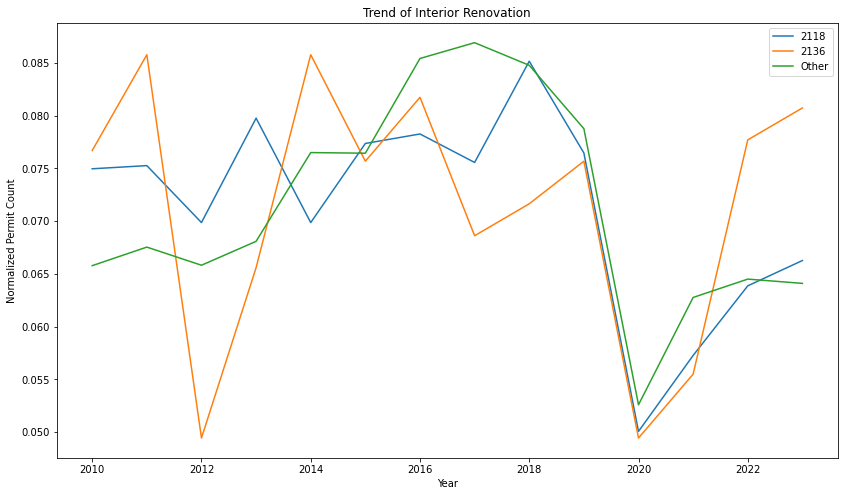

In [89]:
#NORMALIZAITON
for permit_type, group in filtered_df.groupby('worktype'):
    # Create a new figure for each permit type
    plt.figure(figsize=(14, 8))
    plt.title(f"Trend of {permit_type}")
    
    # Iterate over unique values of 'zip' within each permit type
    for zip_code, zip_group in group.groupby('zip'):
        if zip_code != 'others':
            # Normalize counts within each zip code
            total_counts = zip_group.groupby('year').size()
            normalized_counts = total_counts.div(total_counts.sum())
            
            # Plot 'year' against normalized permit count
            plt.plot(normalized_counts.index, normalized_counts.values, label=f'{zip_code}')

    plt.xlabel('Year')
    plt.ylabel('Normalized Permit Count')
    plt.legend()
    plt.show()

In [38]:
tmp_df = filtered_df[filtered_df['zip'].isin([2136, 2118])]

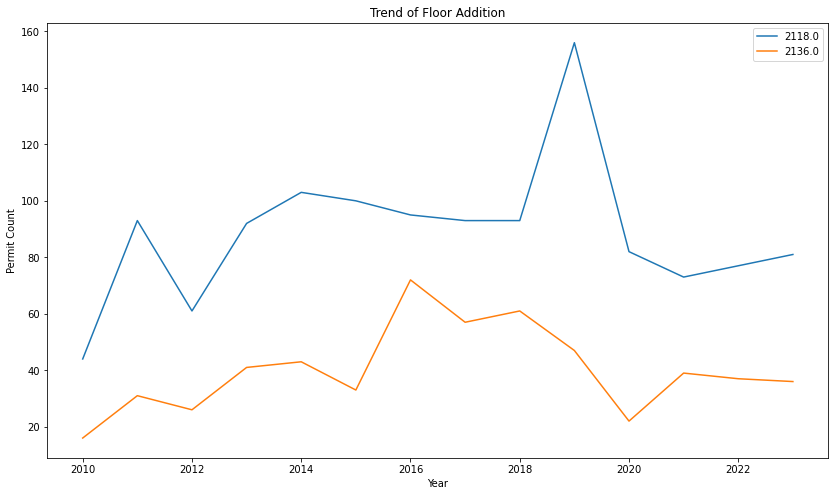

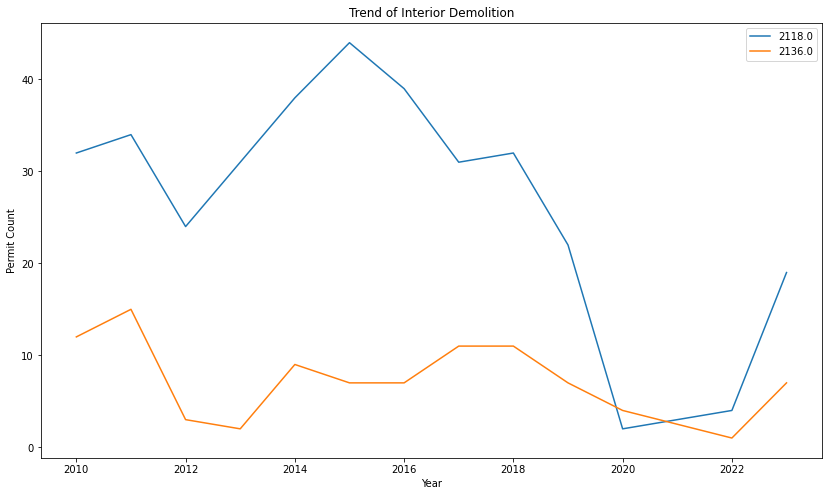

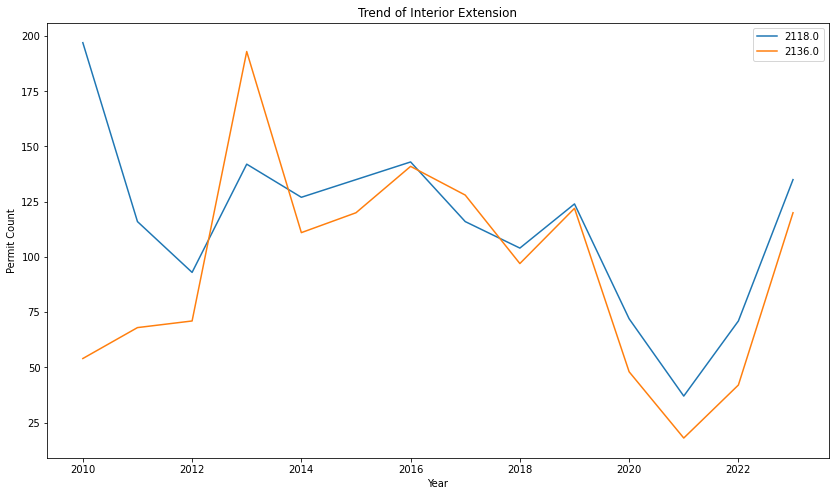

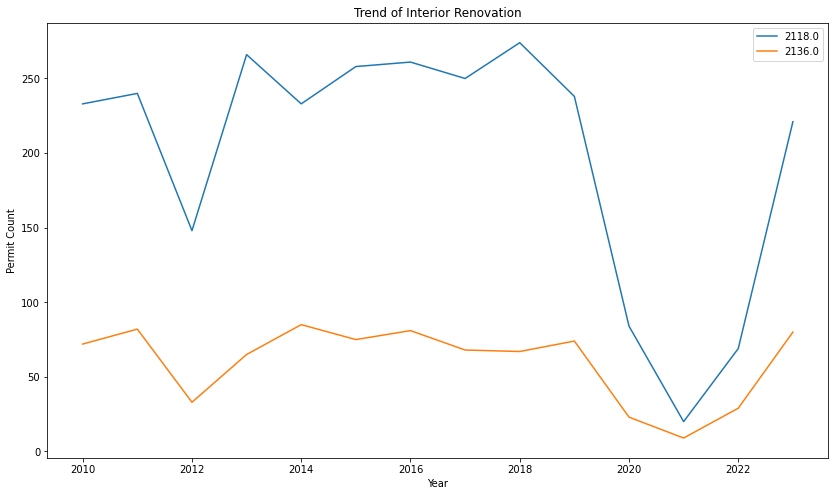

In [40]:
for permit_type, group in tmp_df.groupby('worktype'):
    # Create a new figure for each permit type
    plt.figure(figsize=(14, 8))
    plt.title(f"Trend of {permit_type}")
    
    # Iterate over unique values of 'zip' within each permit type
    for zip_code, zip_group in group.groupby('zip'):
        # Plot 'year' against 'zip'
        year_counts = zip_group.groupby('year').size()
        plt.plot(year_counts.index, year_counts.values, label=f'{zip_code}')

    plt.xlabel('Year')
    plt.ylabel('Permit Count')
    plt.legend()
    plt.show()

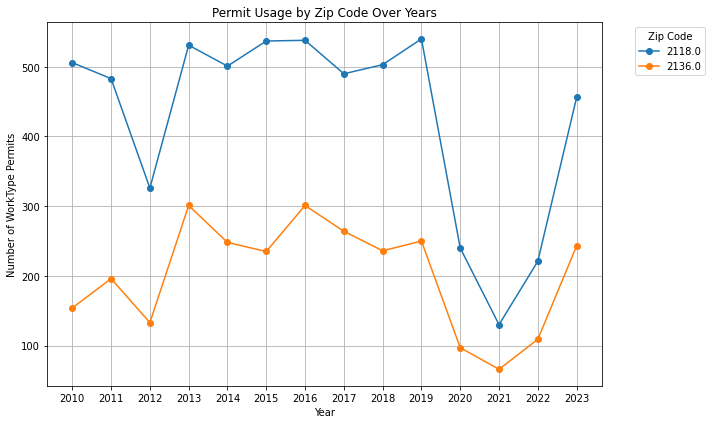

In [41]:
permit_counts = pd.pivot_table(tmp_df, index='zip', columns='year', aggfunc='size', fill_value=0)

# Plotting line plot
permit_counts.T.plot(marker='o', figsize=(10, 6))
plt.title('Permit Usage by Zip Code Over Years')
plt.xlabel('Year')
plt.ylabel('Number of WorkType Permits')
plt.xticks(permit_counts.columns)
plt.legend(title='Zip Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()